Algerian Forest Dataset Link: https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#

`Dataset contains 2 other sub datasets`


In [1]:
import numpy as np
import pandas as pd
from fcmeans import FCM
import seaborn as sns
import skfuzzy
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Algerian_forest_fire_dataset.csv", skiprows=1)
print(data.columns)
data.isnull().sum()


Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')


day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [3]:
data.describe(include="all")

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [4]:
data.head(124)


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Removing name and columns names of the second dataset
data = data.drop(labels=122, axis=0)
data = data.drop(labels=123, axis=0)


In [6]:
data = data.dropna()
print(data.isnull().sum())
data.shape


day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64


(243, 14)

In [7]:
target = data["Classes  "]
data = data.drop(columns=["day", "month", "year", "Classes  "])

In [8]:
print("Before: ", target.unique())
target = target.str.replace("  ", "")
target = target.str.replace(" ", "")
print("After: ", target.unique())

Before:  ['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']
After:  ['notfire' 'fire']


In [9]:
X = data.to_numpy()
X = X.astype("float")
X

array([[29. , 57. , 18. , ...,  1.3,  3.4,  0.5],
       [29. , 61. , 13. , ...,  1. ,  3.9,  0.4],
       [26. , 82. , 22. , ...,  0.3,  2.7,  0.1],
       ...,
       [27. , 87. , 29. , ...,  0.4,  3.4,  0.2],
       [24. , 54. , 18. , ...,  1.7,  5.1,  0.7],
       [24. , 64. , 15. , ...,  1.2,  4.8,  0.5]])

In [10]:
scaledX = MinMaxScaler().fit_transform(X)


In [12]:
# Mapping Target
target = (target == "fire").astype(int)
y = target.to_numpy()

In [45]:
fcm = FCM(n_clusters=2)
fcm.fit(scaledX)


In [46]:
fcm_centers = fcm.centers
fcm_labels = fcm.soft_predict(scaledX)


In [47]:
print("Centers: ", fcm_centers)
print("Labels: ", fcm_labels)


Centers:  [[0.42521568 0.68541706 0.41365382 0.06645692 0.62526524 0.10381958
  0.08074263 0.11844425 0.10931128 0.07340942]
 [0.62695595 0.46821237 0.41269481 0.00926042 0.87831994 0.37477214
  0.37388047 0.44293032 0.41366601 0.45544353]]
Labels:  [[0.92456508 0.07543492]
 [0.94177769 0.05822231]
 [0.72379741 0.27620259]
 [0.775121   0.224879  ]
 [0.93361637 0.06638363]
 [0.93021207 0.06978793]
 [0.55714063 0.44285937]
 [0.72091706 0.27908294]
 [0.83581668 0.16418332]
 [0.89871535 0.10128465]
 [0.72599374 0.27400626]
 [0.67762201 0.32237799]
 [0.84772194 0.15227806]
 [0.91073864 0.08926136]
 [0.87796231 0.12203769]
 [0.81061024 0.18938976]
 [0.81793973 0.18206027]
 [0.91944994 0.08055006]
 [0.90587867 0.09412133]
 [0.93422556 0.06577444]
 [0.92600995 0.07399005]
 [0.9480986  0.0519014 ]
 [0.84497524 0.15502476]
 [0.59293013 0.40706987]
 [0.46173724 0.53826276]
 [0.27071616 0.72928384]
 [0.03153125 0.96846875]
 [0.03705977 0.96294023]
 [0.48731227 0.51268773]
 [0.03311329 0.96688671]


In [68]:
cuts = skfuzzy.lambda_cut(fcm_labels, lcut=0.5)
# list(cuts[:,1]) == [ 1 if x > 0.5 else 0 for x in  list(model_labels[:,1])]
cuts = cuts[:, 1]
cuts

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0])

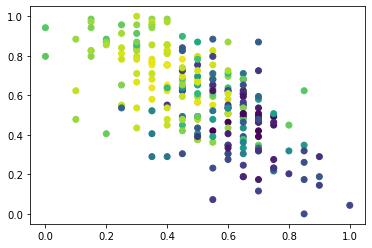

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(scaledX)

d2 = pca.transform(scaledX)

plt.scatter(scaledX[:, 0], scaledX[:, 1], c=fcm_labels[:, 0])

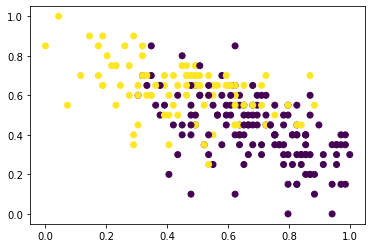

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(scaledX)

d2 = pca.transform(scaledX)

plt.scatter(scaledX[:, 1], scaledX[:, 0], c=cuts)

In [72]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaledX)


d:\Users\miret\anaconda3\envs\uni\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

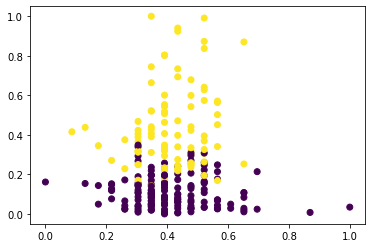

In [73]:
plt.scatter(scaledX[:, 2], scaledX[:, 8], c=kmeans.labels_)
plt.show()


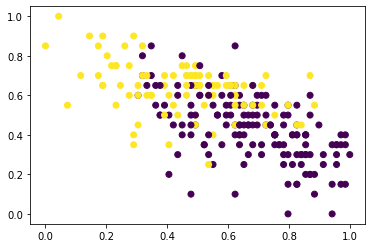

In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(scaledX)

d2 = pca.transform(scaledX)

plt.scatter(scaledX[:, 1], scaledX[:, 0], c=kmeans.labels_)

In [75]:
from sklearn.metrics import accuracy_score

print("Accuracy for FCM: ", accuracy_score(target, cuts))
print("Accuracy for KMeans: ", accuracy_score(target, kmeans.labels_))


Accuracy for FCM:  0.8065843621399177
Accuracy for KMeans:  0.7901234567901234
